In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
import pathlib
from icecream import ic

In [2]:
from compute_full_df import rename_scores

sys.path.append(os.path.abspath("../"))
from utils import aggregate_rank_corrs, plot_rank_corrs

In [3]:
sys.path.append(os.path.abspath("../../"))
from paths import resources_path

scores_path = resources_path / pathlib.Path("scores/feather/scores.csv")
full_df_path = resources_path / pathlib.Path("full_dfs/feather/full_df.csv")
# full_df_path = resources_path / pathlib.Path("full_dfs/feather/full_df_self_computed.csv")

# Load `full_df`

In [4]:
full_df = pd.read_csv(full_df_path)
full_df["mean_cca_corr"] = 1 - full_df["mean_cca_corr"]
full_df["mean_sq_cca_corr"] = 1 - full_df["mean_sq_cca_corr"]

# Dataframe subsetting

In [5]:
# load downstream scores: to select the reference representations
scores_df = pd.read_csv(scores_path)
scores_df = rename_scores(scores_df)

In [6]:
def feather_sub_df(df, task, ref_depth):
    # find best seed for the task
    seeds = list(df.seed1.unique())
    accs = [scores_df.iloc[seed][task] for seed in seeds]
    acc_dict = dict(zip(seeds, accs))
    best_seed = max(acc_dict, key=acc_dict.get)

    # select rows of full_df corresponding to the reference layer (layer depth and seed)
    sub_df = df[(df.layer1 == ref_depth) & (df.layer2 == ref_depth) & ((df.seed1 == best_seed) | (df.seed2 == best_seed))]
    
    return sub_df

# Rank correlation results

In [7]:
METRICS = ['Procrustes', 'CKA', 'PWCCA']
task = "lex_nonent"
num_layers = 12

In [8]:
rho, rho_p, tau, tau_p, bad_fracs = aggregate_rank_corrs(full_df, task, num_layers, METRICS, feather_sub_df)

In [9]:
# average all of these correlations over the different reference layers
for metric in METRICS:
    avg_rho = round(np.mean(rho[metric]), 3)
    avg_rho_p = format(np.mean(rho_p[metric]), ".1e")
    avg_tau = round(np.mean(tau[metric]), 3)
    avg_tau_p = format(np.mean(tau_p[metric]), ".1e")
    avg_bad_frac = round(np.mean(bad_fracs[metric]), 3)

    ic(metric, avg_rho, avg_rho_p, avg_tau, avg_tau_p, avg_bad_frac)
    

TypeError: 'module' object is not callable

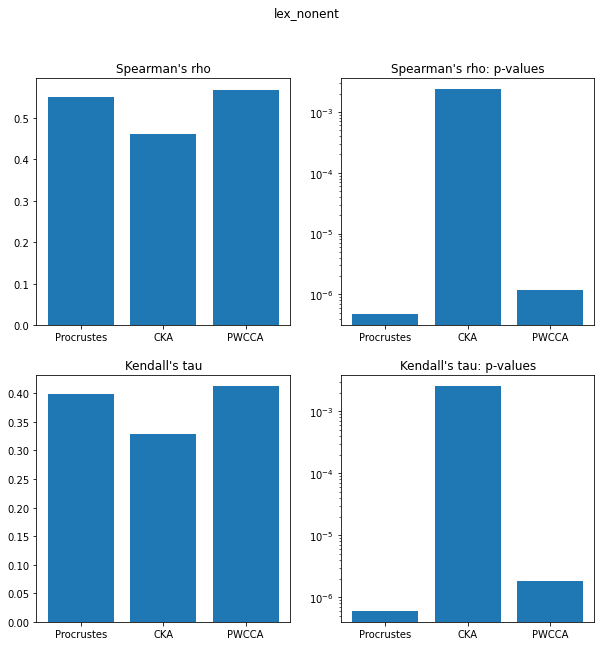

In [30]:
plot_rank_corrs(rho, rho_p, tau, tau_p, METRICS, title = task)